In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [8]:
df = pd.read_csv('../charlie/ready_data2.csv')

In [13]:
df.drop(['row_id.1','row_id.3','row_id.2'],axis=1)
df.head(2)

,row_id,quantity,discount,shipping_cost,sales,profit,order_priority_critical,order_priority_medium,order_priority_low,row_id.1,...,state,country,region,row_id.3,region.1,market,product_id,category,sub_category,product_name
0,40098,2,0.0,40.77,221.98,62.15,0,0,0,40098,...,Oklahoma,United States,Central US,40098,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3
1,26341,9,0.1,923.63,3709.40,-288.77,1,0,0,26341,...,New South Wales,Australia,Oceania,26341,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black"


C:\Users\Charlie\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<Figure size 648x432 with 0 Axes>

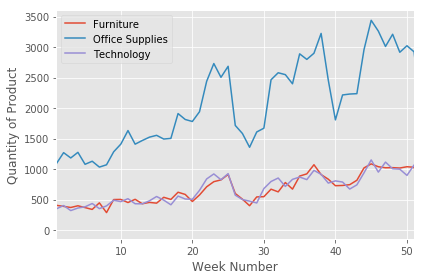

In [233]:
df2 = df[['quantity','order_date','category']]
df2.order_date = pd.to_datetime(df.order_date)
df2 = df2.groupby([df.order_date.dt.strftime('%U'),df.category]).agg({'quantity':'sum'})

plt.figure(figsize=(9,6))
df2.unstack().plot(kind='line',stacked=False)
plt.xlabel('Week Number')
plt.ylabel('Quantity of Product')
plt.xlim(1,51)
plt.tight_layout()
plt.legend(['Furniture','Office Supplies','Technology'])
plt.grid(True)
#plt.xticks(np.arange(1,51,5))
plt.style.use('ggplot')

In [237]:
ret = pd.read_csv('../data/returns.csv')

In [239]:
df.columns

Index(['row_id', 'quantity', 'discount', 'shipping_cost', 'sales', 'profit',
       'order_priority_critical', 'order_priority_medium',
       'order_priority_low', 'row_id.1', 'order_id', 'order_date', 'ship_date',
       'customer_id', 'customer_name', 'ship_mode_first_class',
       'ship_mode_same_day', 'ship_mode_second_class', 'row_id.2',
       'customer_name.1', 'postal_code', 'city', 'state', 'country', 'region',
       'row_id.3', 'region.1', 'market', 'product_id', 'category',
       'sub_category', 'product_name'],
      dtype='object')

order_date  Returned
2012        No          1823355.56
            Yes           85426.88
2013        No          2218855.31
            Yes           96507.54
2014        No          2881682.89
            Yes          124062.57
2015        No          3786595.16
            Yes          158564.67
dtype: float64


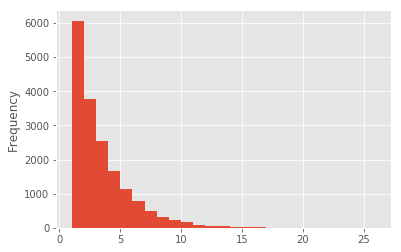

Number of Customers with 5 or more Returns: 2247


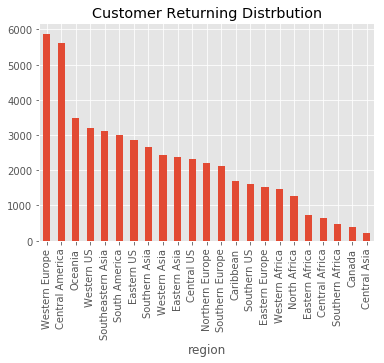

Countries with Most Returns: ['Western Europe' 'Central America' 'Oceania' 'Western US'
 'Southeastern Asia']


In [327]:
df3 = pd.merge(left = ret, right = df, how = 'outer',left_on ='Order ID',right_on = 'order_id')
df3 = df3[['Returned','order_id','region','sales','profit','category','customer_id','order_date','product_name']]
df3.Returned = df3.Returned.fillna(value='No')

#1.How much profit did we lose due to returns each year?
df3_1 = df3.groupby([df.order_date.dt.strftime('%Y'),df3.Returned]).agg({'profit':'sum','sales':'sum'})
print(df3_1.sales-df3_1.profit)


#2. Which regions are more likely to return orders?
df3_2 = df3.groupby(df.customer_id).agg('count')

df3_2['Returned'].plot.hist(bins=25)
plt.show()
plt.title('Customer Returning Distrbution')
df3_2a = len(df3_2[df3_2.Returned > 5]['Returned'])
print('Number of Customers with 5 or more Returns: {}'.format(df3_2a))

#3. Which regions are more likely to return orders?
df3_3 = df3.groupby(['region']).agg('count')['Returned']
df3_3.sort_values(ascending=False).plot.bar()
plt.show()
print('Countries with Most Returns: {}'.format(df3_3.sort_values(ascending=False)[:5].index.values))